In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/bank_marketing.zip")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [3]:
df.drop(["ID"], axis=1, inplace=True)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [5]:
df.isnull().sum()*100/df.shape[0]

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [6]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i].nunique(), df[i].unique())
        cat.append(i)
    else:
        num.append(i)

marital 3 ['single' 'married' 'divorced']
education 4 ['tertiary' 'secondary' 'unknown' 'primary']
default 2 ['no' 'yes']
housing 2 ['no' 'yes']
loan 2 ['no' 'yes']
contact 3 ['cellular' 'unknown' 'telephone']
poutcome 4 ['unknown' 'failure' 'other' 'success']
y 2 ['no' 'yes']


In [7]:
cat

['marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [8]:
num

['age', 'job', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous']

In [9]:
df['y'].value_counts()

,count
y,
no,8903
yes,3967


In [10]:
import matplotlib.pyplot as plt

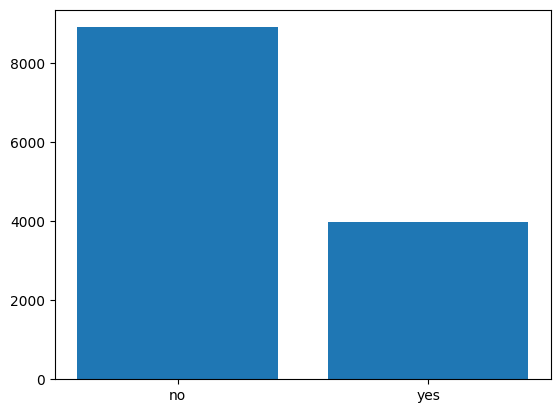

In [11]:
plt.bar(height=df['y'].value_counts(),x=df['y'].value_counts().index)
plt.show()

In [12]:
no_cat= df[df['y']=='no'].sample(3967)

In [13]:
no_cat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1579,32,technician,single,secondary,no,283,yes,no,cellular,29,jan,1,-1,0,unknown,no
11040,54,management,married,tertiary,no,1451,no,no,cellular,25,aug,7,-1,0,unknown,no
5980,45,blue-collar,married,primary,no,959,yes,no,unknown,15,may,1,-1,0,unknown,no
844,39,technician,married,secondary,no,-1451,yes,yes,cellular,30,jul,5,-1,0,unknown,no
1724,42,services,married,secondary,no,1027,yes,no,telephone,17,nov,2,168,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570,50,management,married,tertiary,no,383,no,yes,cellular,11,jul,2,-1,0,unknown,no
2838,50,services,single,secondary,no,516,yes,no,unknown,15,may,1,-1,0,unknown,no
4481,46,services,divorced,primary,no,3854,yes,no,cellular,17,apr,2,150,4,other,no
4104,41,entrepreneur,married,secondary,no,547,no,no,cellular,29,jul,2,-1,0,unknown,no


In [14]:
yes_cat= df[df['y']=='yes']
yes_cat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
5,22,student,single,secondary,no,185,no,no,cellular,8,jul,1,-1,0,unknown,yes
6,53,blue-collar,married,secondary,no,1777,yes,no,cellular,21,nov,5,154,1,failure,yes
8,59,management,married,tertiary,no,3342,no,no,cellular,18,mar,2,188,6,other,yes
9,37,housemaid,single,secondary,no,465,yes,no,cellular,18,may,3,-1,0,unknown,yes
14,90,retired,divorced,primary,no,712,no,no,telephone,3,mar,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12857,56,unemployed,single,primary,no,1110,no,no,cellular,4,feb,2,-1,0,unknown,yes
12861,66,management,married,unknown,no,2149,yes,no,cellular,25,feb,1,87,10,failure,yes
12862,27,management,single,primary,yes,13,no,no,cellular,30,jan,3,-1,0,unknown,yes
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes


In [15]:
df_resampled=pd.concat([no_cat,yes_cat], axis=0)
df_resampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1579,32,technician,single,secondary,no,283,yes,no,cellular,29,jan,1,-1,0,unknown,no
11040,54,management,married,tertiary,no,1451,no,no,cellular,25,aug,7,-1,0,unknown,no
5980,45,blue-collar,married,primary,no,959,yes,no,unknown,15,may,1,-1,0,unknown,no
844,39,technician,married,secondary,no,-1451,yes,yes,cellular,30,jul,5,-1,0,unknown,no
1724,42,services,married,secondary,no,1027,yes,no,telephone,17,nov,2,168,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12857,56,unemployed,single,primary,no,1110,no,no,cellular,4,feb,2,-1,0,unknown,yes
12861,66,management,married,unknown,no,2149,yes,no,cellular,25,feb,1,87,10,failure,yes
12862,27,management,single,primary,yes,13,no,no,cellular,30,jan,3,-1,0,unknown,yes
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes


In [16]:
cat=[]
num=[]
for i in df_resampled.columns:
    if df_resampled[i].dtype=="O":

        cat.append(i)
    else:
        num.append(i)

In [17]:
num

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

In [18]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

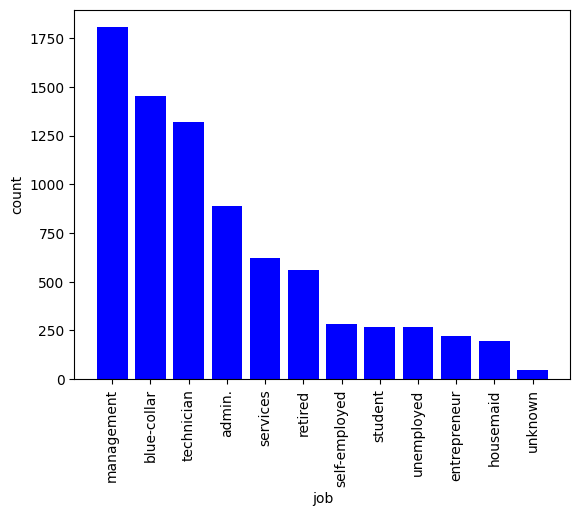

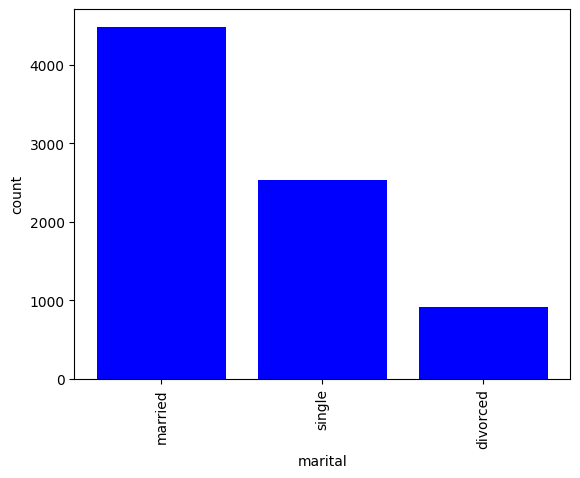

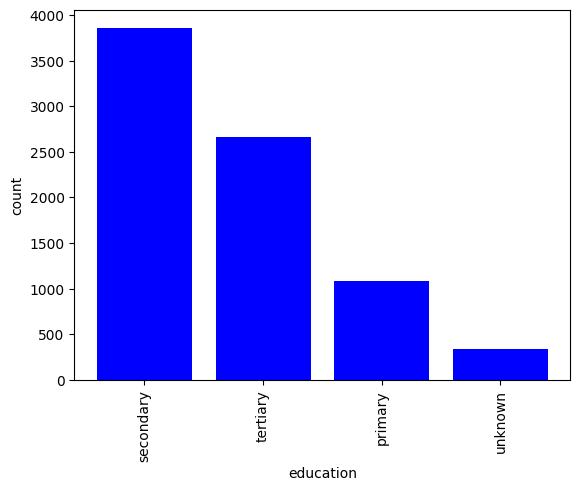

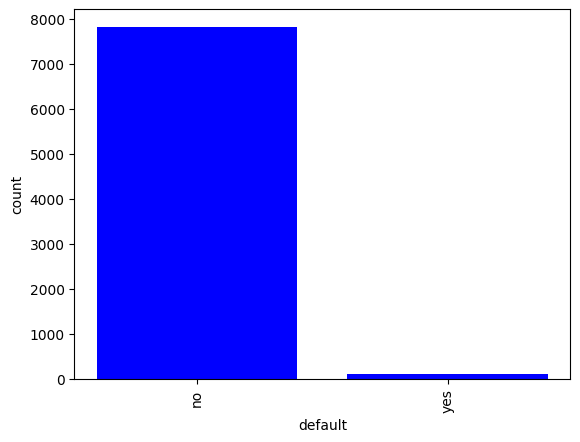

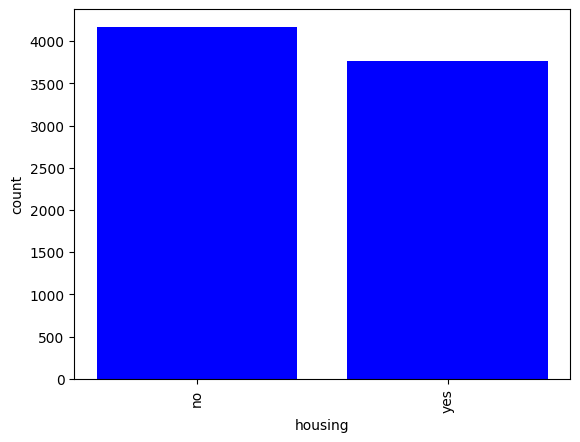

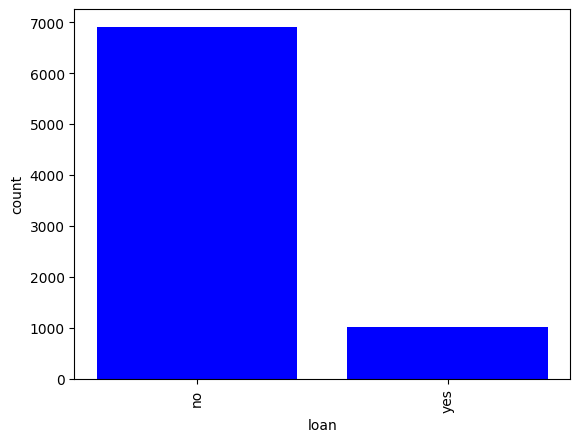

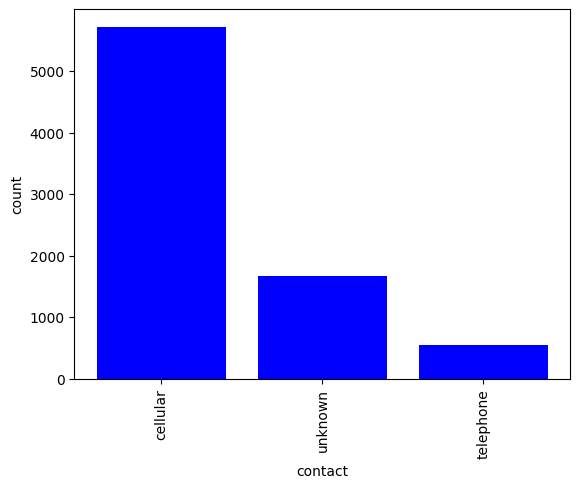

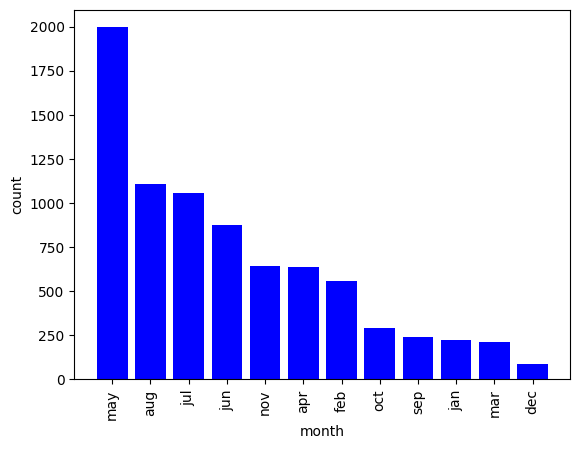

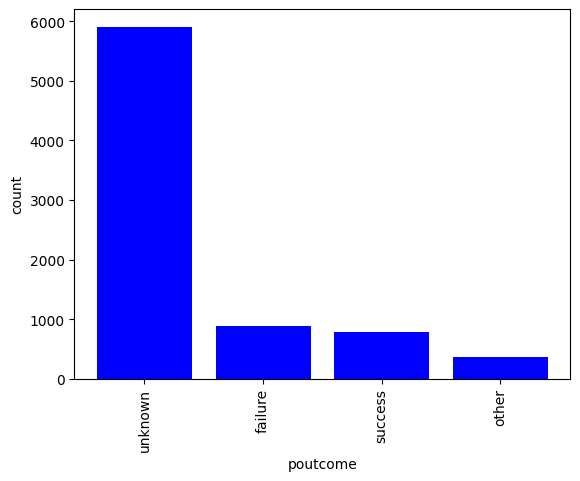

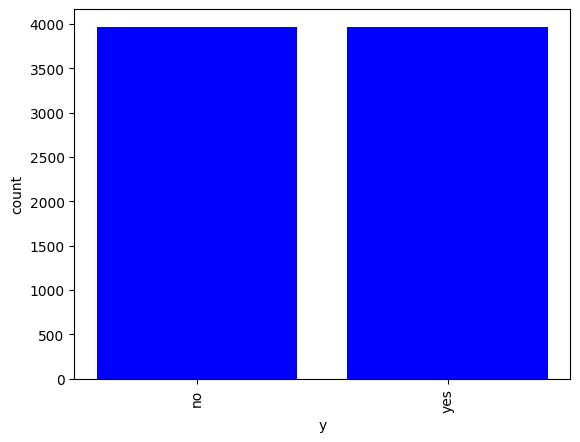

In [19]:
for i in cat:
    vc=df_resampled[i].value_counts()
    plt.bar(vc.index, height= vc, color= 'b')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.ylabel("count")
    plt.show()

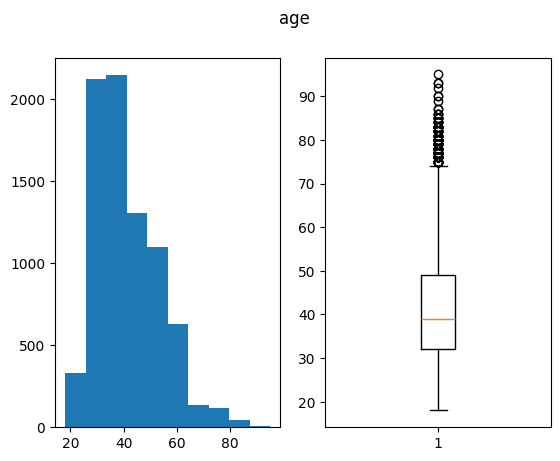

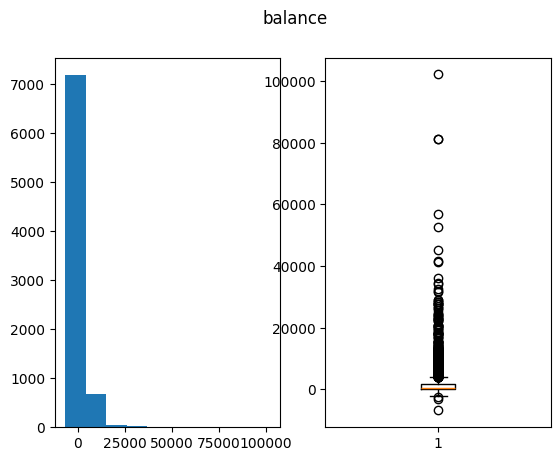

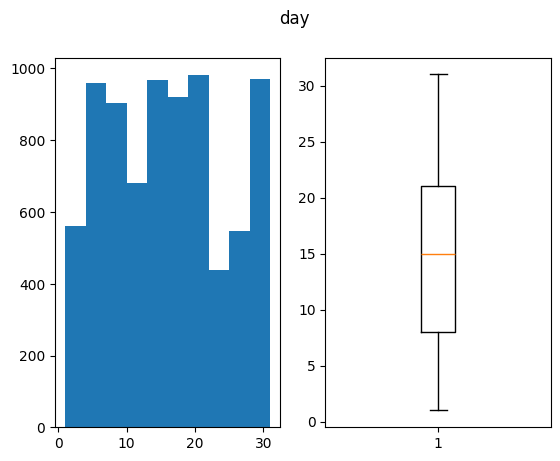

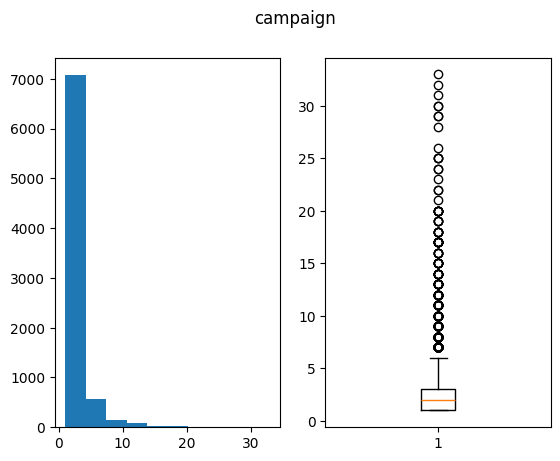

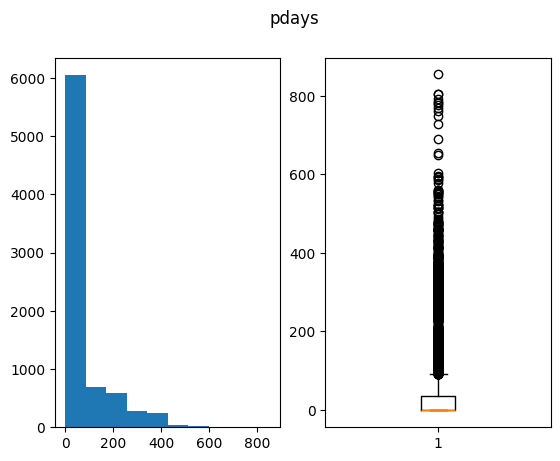

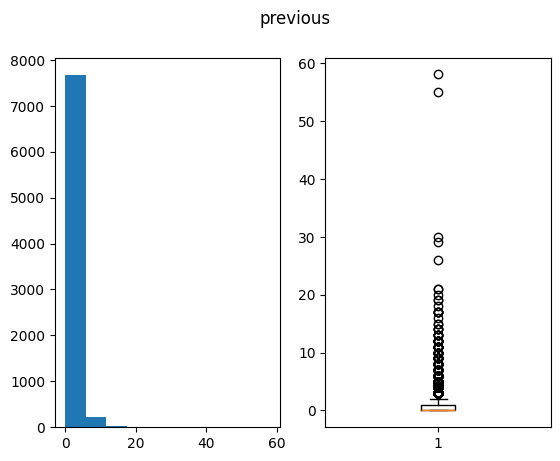

In [20]:
for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df_resampled[i])
    ax[1].boxplot(df_resampled[i])
    plt.suptitle(i)
    plt.show()

In [21]:
#IQR WINSORIZATION
#replace lower outlier with lower fennce
#replace upper outlier with upper fennce
for i in num:
 q1= df_resampled[i].quantile(0.25)
 q3= df_resampled[i].quantile(0.75)
 iqr= q3-q1
 lf= q1-1.5*iqr
 uf=q3+1.5*iqr
 df_resampled.loc[df_resampled[i]<lf,i]=lf
 df_resampled.loc[df_resampled[i]>uf,i]=uf

<ipython-input-21-e6dacd776841>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resampled.loc[df_resampled[i]<lf,i]=lf
<ipython-input-21-e6dacd776841>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2218.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resampled.loc[df_resampled[i]<lf,i]=lf
<ipython-input-21-e6dacd776841>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-11.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resampled.loc[df_resampled[i]<lf,i]=lf
<ipython-input-21-e6dacd776841>:10: FutureWarning: Setting an item of incompatible dtype is

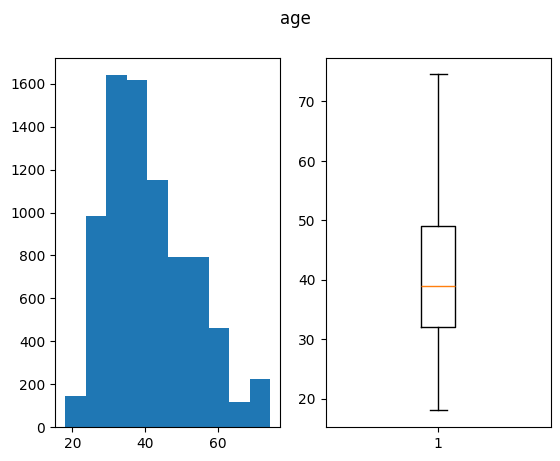

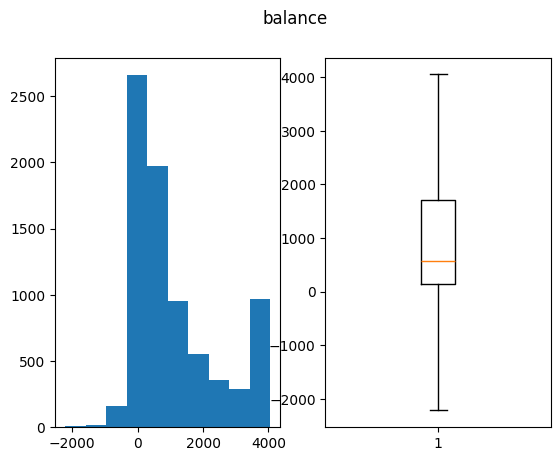

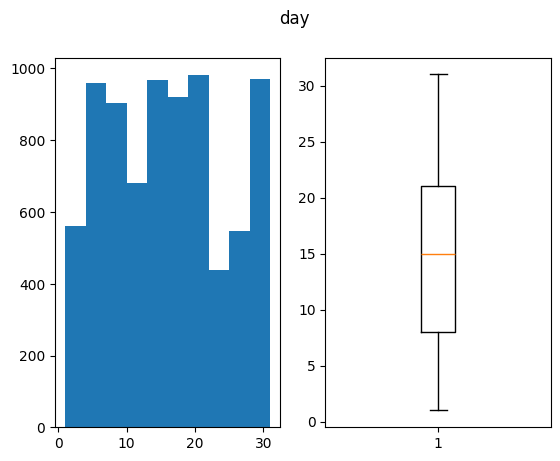

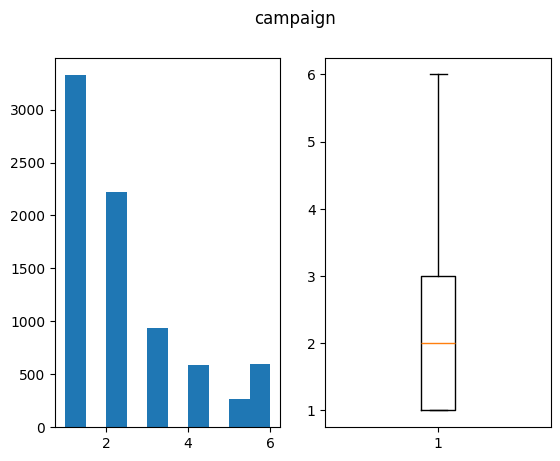

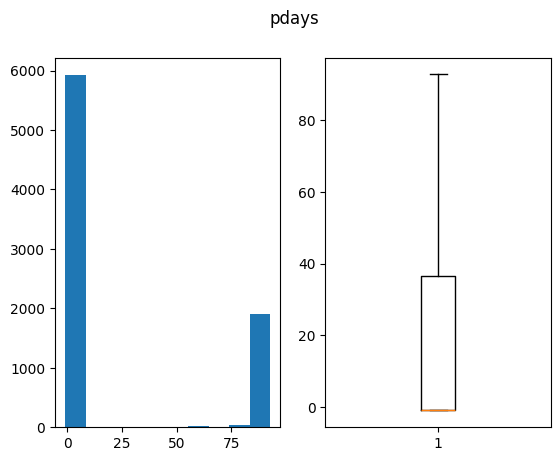

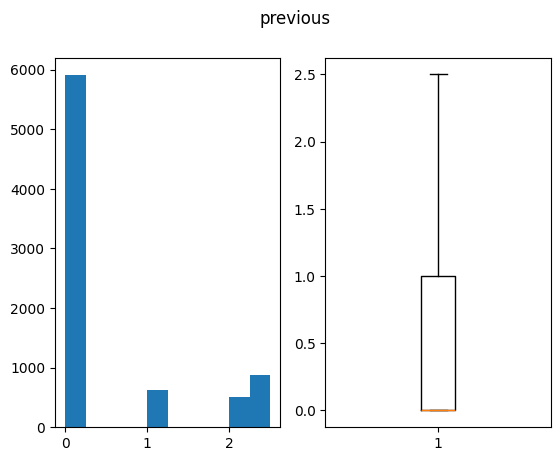

In [22]:
for i in num:
    fig,ax=plt.subplots(1,2)
    ax[0].hist(df_resampled[i])
    ax[1].boxplot(df_resampled[i])
    plt.suptitle(i)
    plt.show()

In [23]:
df_resampled.drop(['pdays','previous'], axis=1, inplace=True)
df_resampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,y
1579,32.0,technician,single,secondary,no,283.0,yes,no,cellular,29.0,jan,1,unknown,no
11040,54.0,management,married,tertiary,no,1451.0,no,no,cellular,25.0,aug,6,unknown,no
5980,45.0,blue-collar,married,primary,no,959.0,yes,no,unknown,15.0,may,1,unknown,no
844,39.0,technician,married,secondary,no,-1451.0,yes,yes,cellular,30.0,jul,5,unknown,no
1724,42.0,services,married,secondary,no,1027.0,yes,no,telephone,17.0,nov,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12857,56.0,unemployed,single,primary,no,1110.0,no,no,cellular,4.0,feb,2,unknown,yes
12861,66.0,management,married,unknown,no,2149.0,yes,no,cellular,25.0,feb,1,failure,yes
12862,27.0,management,single,primary,yes,13.0,no,no,cellular,30.0,jan,3,unknown,yes
12865,47.0,technician,married,secondary,no,1167.0,yes,no,cellular,30.0,apr,1,failure,yes


In [24]:
df_resampled.drop(['default','loan','contact','poutcome'], axis = 1, inplace = True)
df_resampled

,age,job,marital,education,balance,housing,day,month,campaign,y
1579,32.0,technician,single,secondary,283.0,yes,29.0,jan,1,no
11040,54.0,management,married,tertiary,1451.0,no,25.0,aug,6,no
5980,45.0,blue-collar,married,primary,959.0,yes,15.0,may,1,no
844,39.0,technician,married,secondary,-1451.0,yes,30.0,jul,5,no
1724,42.0,services,married,secondary,1027.0,yes,17.0,nov,2,no
...,...,...,...,...,...,...,...,...,...,...
12857,56.0,unemployed,single,primary,1110.0,no,4.0,feb,2,yes
12861,66.0,management,married,unknown,2149.0,yes,25.0,feb,1,yes
12862,27.0,management,single,primary,13.0,no,30.0,jan,3,yes
12865,47.0,technician,married,secondary,1167.0,yes,30.0,apr,1,yes


In [25]:
df_resampled['job'].value_counts()

,count
job,
management,1806
blue-collar,1455
technician,1318
admin.,890
services,621
retired,558
self-employed,285
student,269
unemployed,266


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe_job= OneHotEncoder(sparse_output= False)
job= ohe_job.fit_transform(df_resampled[['job']])
job

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
job_df=pd.DataFrame(job, columns= ohe_job.categories_)
job_df.drop('admin.', axis=1, inplace= True)

In [29]:
df_resampled.reset_index(inplace= True)
df_resampled

,index,age,job,marital,education,balance,housing,day,month,campaign,y
0,1579,32.0,technician,single,secondary,283.0,yes,29.0,jan,1,no
1,11040,54.0,management,married,tertiary,1451.0,no,25.0,aug,6,no
2,5980,45.0,blue-collar,married,primary,959.0,yes,15.0,may,1,no
3,844,39.0,technician,married,secondary,-1451.0,yes,30.0,jul,5,no
4,1724,42.0,services,married,secondary,1027.0,yes,17.0,nov,2,no
...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,primary,1110.0,no,4.0,feb,2,yes
7930,12861,66.0,management,married,unknown,2149.0,yes,25.0,feb,1,yes
7931,12862,27.0,management,single,primary,13.0,no,30.0,jan,3,yes
7932,12865,47.0,technician,married,secondary,1167.0,yes,30.0,apr,1,yes


In [30]:
df_resampled=pd.concat([df_resampled, job_df ], axis=1, )
df_resampled

,index,age,job,marital,education,balance,housing,day,month,campaign,...,"(entrepreneur,)","(housemaid,)","(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)"
0,1579,32.0,technician,single,secondary,283.0,yes,29.0,jan,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11040,54.0,management,married,tertiary,1451.0,no,25.0,aug,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5980,45.0,blue-collar,married,primary,959.0,yes,15.0,may,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,844,39.0,technician,married,secondary,-1451.0,yes,30.0,jul,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1724,42.0,services,married,secondary,1027.0,yes,17.0,nov,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,primary,1110.0,no,4.0,feb,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7930,12861,66.0,management,married,unknown,2149.0,yes,25.0,feb,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7931,12862,27.0,management,single,primary,13.0,no,30.0,jan,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7932,12865,47.0,technician,married,secondary,1167.0,yes,30.0,apr,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
ohe_marital= OneHotEncoder(sparse_output= False)
marital= ohe_marital.fit_transform(df_resampled[['marital']])
marital

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [32]:
marital_df=pd.DataFrame(marital, columns= ohe_marital.categories_)
marital_df.drop('divorced', axis=1, inplace= True)
marital_df

,married,single
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
7929,0.0,1.0
7930,1.0,0.0
7931,0.0,1.0
7932,1.0,0.0


In [33]:
df_resampled=pd.concat([df_resampled, marital_df ], axis=1, )
df_resampled

,index,age,job,marital,education,balance,housing,day,month,campaign,...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,technician,single,secondary,283.0,yes,29.0,jan,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,management,married,tertiary,1451.0,no,25.0,aug,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,blue-collar,married,primary,959.0,yes,15.0,may,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,technician,married,secondary,-1451.0,yes,30.0,jul,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,services,married,secondary,1027.0,yes,17.0,nov,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,primary,1110.0,no,4.0,feb,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,management,married,unknown,2149.0,yes,25.0,feb,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,management,single,primary,13.0,no,30.0,jan,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,technician,married,secondary,1167.0,yes,30.0,apr,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
df_resampled['education'].value_counts()

,count
education,
secondary,3861
tertiary,2658
primary,1081
unknown,334


In [35]:
df_resampled['education'].replace(to_replace=['tertiary', 'secondary', 'primary', 'unknown'], value=[2, 1, 0 , 1], inplace= True)

<ipython-input-35-95fbec11e7ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['education'].replace(to_replace=['tertiary', 'secondary', 'primary', 'unknown'], value=[2, 1, 0 , 1], inplace= True)
<ipython-input-35-95fbec11e7ac>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_resam

In [36]:
df_resampled

,index,age,job,marital,education,balance,housing,day,month,campaign,...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,technician,single,1,283.0,yes,29.0,jan,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,management,married,2,1451.0,no,25.0,aug,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,blue-collar,married,0,959.0,yes,15.0,may,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,technician,married,1,-1451.0,yes,30.0,jul,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,services,married,1,1027.0,yes,17.0,nov,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,0,1110.0,no,4.0,feb,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,management,married,1,2149.0,yes,25.0,feb,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,management,single,0,13.0,no,30.0,jan,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,technician,married,1,1167.0,yes,30.0,apr,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
df_resampled['housing'].value_counts()

,count
housing,
no,4169
yes,3765


In [38]:
df_resampled['housing'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace= True)
df_resampled

<ipython-input-38-66b2bddd1155>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['housing'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace= True)
<ipython-input-38-66b2bddd1155>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_resampled['housing'].replace(to_replace=['no', '

,index,age,job,marital,education,balance,housing,day,month,campaign,...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,technician,single,1,283.0,1,29.0,jan,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,management,married,2,1451.0,0,25.0,aug,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,blue-collar,married,0,959.0,1,15.0,may,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,technician,married,1,-1451.0,1,30.0,jul,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,services,married,1,1027.0,1,17.0,nov,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,0,1110.0,0,4.0,feb,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,management,married,1,2149.0,1,25.0,feb,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,management,single,0,13.0,0,30.0,jan,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,technician,married,1,1167.0,1,30.0,apr,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
df_resampled['month'].value_counts()

,count
month,
may,1996
aug,1110
jul,1059
jun,875
nov,642
apr,638
feb,560
oct,292
sep,238


In [40]:
df_resampled['month'].replace(to_replace=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], value=[0 , 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)

<ipython-input-40-ac9dedc21f3b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['month'].replace(to_replace=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], value=[0 , 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
<ipython-input-40-ac9dedc21f3b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [41]:
df_resampled

,index,age,job,marital,education,balance,housing,day,month,campaign,...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,technician,single,1,283.0,1,29.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,management,married,2,1451.0,0,25.0,8,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,blue-collar,married,0,959.0,1,15.0,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,technician,married,1,-1451.0,1,30.0,7,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,services,married,1,1027.0,1,17.0,11,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,unemployed,single,0,1110.0,0,4.0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,management,married,1,2149.0,1,25.0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,management,single,0,13.0,0,30.0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,technician,married,1,1167.0,1,30.0,4,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
df_resampled.drop(['job','marital'], axis=1, inplace= True)

In [43]:
df_resampled

,index,age,education,balance,housing,day,month,campaign,y,"(blue-collar,)",...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,1,283.0,1,29.0,0,1,no,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,2,1451.0,0,25.0,8,6,no,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,0,959.0,1,15.0,5,1,no,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,1,-1451.0,1,30.0,7,5,no,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,1,1027.0,1,17.0,11,2,no,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,0,1110.0,0,4.0,1,2,yes,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,1,2149.0,1,25.0,1,1,yes,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,0,13.0,0,30.0,0,3,yes,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,1,1167.0,1,30.0,4,1,yes,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df_resampled['y']=le.fit_transform(df_resampled['y'])
df_resampled


,index,age,education,balance,housing,day,month,campaign,y,"(blue-collar,)",...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,1,283.0,1,29.0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,2,1451.0,0,25.0,8,6,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,0,959.0,1,15.0,5,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,1,-1451.0,1,30.0,7,5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,1,1027.0,1,17.0,11,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,0,1110.0,0,4.0,1,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,1,2149.0,1,25.0,1,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,0,13.0,0,30.0,0,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,1,1167.0,1,30.0,4,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
x=df_resampled.drop('y', axis=1)
y=df_resampled['y']
x

,index,age,education,balance,housing,day,month,campaign,"(blue-collar,)","(entrepreneur,)",...,"(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)","(unemployed,)","(unknown,)","(married,)","(single,)"
0,1579,32.0,1,283.0,1,29.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11040,54.0,2,1451.0,0,25.0,8,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5980,45.0,0,959.0,1,15.0,5,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,844,39.0,1,-1451.0,1,30.0,7,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1724,42.0,1,1027.0,1,17.0,11,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,12857,56.0,0,1110.0,0,4.0,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7930,12861,66.0,1,2149.0,1,25.0,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7931,12862,27.0,0,13.0,0,30.0,0,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7932,12865,47.0,1,1167.0,1,30.0,4,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
x= x.values
y= y.values

In [47]:
x

array([[1.5790e+03, 3.2000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.1040e+04, 5.4000e+01, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.9800e+03, 4.5000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.2862e+04, 2.7000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2865e+04, 4.7000e+01, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2866e+04, 3.1000e+01, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [48]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model= LogisticRegression()
model.fit(x_train, y_train)
y_train_predicted= model.predict(x_train)
y_test_predicted= model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
y_test_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [54]:
predicted_proba= model.predict_proba(x_test)
predicted_proba

array([[0.67490691, 0.32509309],
       [0.71212126, 0.28787874],
       [0.4497551 , 0.5502449 ],
       ...,
       [0.74076184, 0.25923816],
       [0.69538116, 0.30461884],
       [0.49853259, 0.50146741]])

In [55]:
x_test.shape

(2381, 21)

In [56]:
threshold=0.6
y_test_predicted= (predicted_proba[:,1]>threshold).astype('int')
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,confusion_matrix

In [58]:
print("Model Performance")
print("Tranining accuracy:", accuracy_score(y_train, y_train_predicted))
print("Tranining precision:", precision_score(y_train, y_train_predicted))
print("Tranining recall:", recall_score(y_train, y_train_predicted))
print("Traniaing confusion_matrix:", confusion_matrix(y_train, y_train_predicted))
print("Traniaing classification_report:", classification_report(y_train, y_train_predicted))

Model Performance
Tranining accuracy: 0.640194489465154
Tranining precision: 0.6345538570920726
Tranining recall: 0.647912885662432
Traniaing confusion_matrix: [[1770 1028]
 [ 970 1785]]
Traniaing classification_report:               precision    recall  f1-score   support

           0       0.65      0.63      0.64      2798
           1       0.63      0.65      0.64      2755

    accuracy                           0.64      5553
   macro avg       0.64      0.64      0.64      5553
weighted avg       0.64      0.64      0.64      5553



In [59]:
print("Model Performance")
print("Testing accuracy:", accuracy_score(y_test, y_test_predicted))
print("Testing precision:", precision_score(y_test, y_test_predicted))
print("Testing recall:", recall_score(y_test, y_test_predicted))
print("Testing confusion_matrix:", confusion_matrix(y_test, y_test_predicted))
print("Testing classification_report:", classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy: 0.6085678286434272
Testing precision: 0.7058823529411765
Testing recall: 0.39603960396039606
Testing confusion_matrix: [[969 200]
 [732 480]]
Testing classification_report:               precision    recall  f1-score   support

           0       0.57      0.83      0.68      1169
           1       0.71      0.40      0.51      1212

    accuracy                           0.61      2381
   macro avg       0.64      0.61      0.59      2381
weighted avg       0.64      0.61      0.59      2381



In [60]:
#when we need to increase the accuracy of the model then we use gridsearchCV(which is the best parameter)
from sklearn.model_selection import GridSearchCV
log_reg= LogisticRegression(max_iter=1000)
param_grid={
    "C":[0.001,0.01,0.1,1,10],
            "penalty":["l1","l2","elasticnet"],
    }



In [61]:
grid_search= GridSearchCV(log_reg, param_grid, cv=5)



In [62]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [63]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [64]:
grid_search.best_score_

0.6383887577946984

In [65]:
model= LogisticRegression(C= 0.01, penalty= 'l2')
model.fit(x_train, y_train)
y_train_predicted= model.predict(x_train)
y_test_predicted= model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print("Model Performance")
print("Tranining accuracy:", accuracy_score(y_train, y_train_predicted))
#print("Tranining precision:", precision_score(y_train, y_train_predicted))
#print("Tranining recall:", recall_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Tranining accuracy: 0.6259679452548172

[[1715 1083]
 [ 994 1761]]


              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2798
           1       0.62      0.64      0.63      2755

    accuracy                           0.63      5553
   macro avg       0.63      0.63      0.63      5553
weighted avg       0.63      0.63      0.63      5553



In [67]:
print("Model Performance")
print("Testing accuracy:", accuracy_score(y_test, y_test_predicted))
#print("Testing precision:", precision_score(y_test, y_test_predicted))
#print("Testing recall:", recall_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy: 0.630407391852163

[[721 448]
 [432 780]]


              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1169
           1       0.64      0.64      0.64      1212

    accuracy                           0.63      2381
   macro avg       0.63      0.63      0.63      2381
weighted avg       0.63      0.63      0.63      2381



In [68]:
#KNN CLASSIFIER

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
knn_model= KNeighborsClassifier(7)
knn_model.fit(x_train, y_train)
ytrain_knn_predicted= knn_model.predict(x_train)
ytrain_knn_predicted

array([0, 1, 0, ..., 0, 0, 1])

In [72]:
print("Model Performance")
print("Tranining accuracy:", accuracy_score(y_train, ytrain_knn_predicted))
# print("Tranining precision:", precision_score(y_train, ytrain_knn_predicted))
# print("Tranining recall:", recall_score(y_train, ytrain_knn_predicted))
print(  )

print( confusion_matrix(y_train, ytrain_knn_predicted))
print()
print(classification_report(y_train, ytrain_knn_predicted))

Model Performance
Tranining accuracy: 0.6808932108770034

[[1907  891]
 [ 881 1874]]

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2798
           1       0.68      0.68      0.68      2755

    accuracy                           0.68      5553
   macro avg       0.68      0.68      0.68      5553
weighted avg       0.68      0.68      0.68      5553



In [73]:
knn_model = KNeighborsClassifier(7)
knn_model.fit(x_test, y_test)
ytest_knn_predicted = knn_model.predict(x_test)
ytest_knn_predicted

array([0, 1, 1, ..., 0, 0, 0])

In [74]:
print("Model Performance")
print("Testing Accuracy: ", accuracy_score(y_test, ytest_knn_predicted))
print()
# print("Testing Precision: ", precision_score(y_test,ytest_knn_predicted))
# print("Testing Recall: ", recall_score(y_test, ytest_knn_predicted))
print()
print(confusion_matrix(y_test,ytest_knn_predicted))
print()
print(classification_report(y_test,ytest_knn_predicted))

Model Performance
Testing Accuracy:  0.6606467870642587


[[755 414]
 [394 818]]

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1169
           1       0.66      0.67      0.67      1212

    accuracy                           0.66      2381
   macro avg       0.66      0.66      0.66      2381
weighted avg       0.66      0.66      0.66      2381



In [75]:
#KNN GridSearch
from sklearn.model_selection import GridSearchCV
dt= KNeighborsClassifier()
param_grid={

        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']


}

In [76]:
grid_search= GridSearchCV(dt, param_grid, cv=5)


In [77]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [78]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [79]:
grid_search.best_score_

0.5452930157880653

In [80]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors= 9, weights='uniform')
knn_model.fit(x_test, y_test)
ytest_knn_predicted = knn_model.predict(x_test)
ytest_knn_predicted

array([0, 1, 1, ..., 0, 0, 0])

In [81]:
print("Model Performance")
print("Tranining accuracy:", accuracy_score(y_train, ytrain_knn_predicted))
# print("Tranining precision:", precision_score(y_train, ytrain_knn_predicted))
# print("Tranining recall:", recall_score(y_train, ytrain_knn_predicted))
print(  )

print( confusion_matrix(y_train, ytrain_knn_predicted))
print()
print(classification_report(y_train, ytrain_knn_predicted))

Model Performance
Tranining accuracy: 0.6808932108770034

[[1907  891]
 [ 881 1874]]

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2798
           1       0.68      0.68      0.68      2755

    accuracy                           0.68      5553
   macro avg       0.68      0.68      0.68      5553
weighted avg       0.68      0.68      0.68      5553



In [82]:
print("Model Performance")
print("Testing Accuracy: ", accuracy_score(y_test, ytest_knn_predicted))
print()
# print("Testing Precision: ", precision_score(y_test,ytest_knn_predicted))
# print("Testing Recall: ", recall_score(y_test, ytest_knn_predicted))
print()
print(confusion_matrix(y_test,ytest_knn_predicted))
print()
print(classification_report(y_test,ytest_knn_predicted))

Model Performance
Testing Accuracy:  0.631667366652667


[[717 452]
 [425 787]]

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1169
           1       0.64      0.65      0.64      1212

    accuracy                           0.63      2381
   macro avg       0.63      0.63      0.63      2381
weighted avg       0.63      0.63      0.63      2381



In [83]:
#decision Tree Classifiers
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_train_predicted = dtree.predict(x_train)
y_test_predicted = dtree.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [86]:
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Training accuracy:  1.0

[[2798    0]
 [   0 2755]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2798
           1       1.00      1.00      1.00      2755

    accuracy                           1.00      5553
   macro avg       1.00      1.00      1.00      5553
weighted avg       1.00      1.00      1.00      5553



In [87]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.5884082318353633

[[699 470]
 [510 702]]


              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1169
           1       0.60      0.58      0.59      1212

    accuracy                           0.59      2381
   macro avg       0.59      0.59      0.59      2381
weighted avg       0.59      0.59      0.59      2381



In [88]:
# tune the hyperparameter
# GridSearchCV will show the good quality of data , finds the best hyperparameters
# grid = table
#DecisionTreeClassifier GridSearchCv
from sklearn.model_selection import GridSearchCV ## Cross Validation
dtree = DecisionTreeClassifier(max_depth= 10)
    # Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],    #min data to split
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [89]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring = 'accuracy')

In [90]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [91]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [92]:
grid_search.best_score_

0.6378516230001379

In [93]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_leaf= 4, min_samples_split= 10)
dtree.fit(x_train, y_train)
y_train_predicted = dtree.predict(x_train)
y_test_predicted = dtree.predict(x_test)

In [94]:
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Training accuracy:  0.7496848550333153

[[2137  661]
 [ 729 2026]]


              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2798
           1       0.75      0.74      0.74      2755

    accuracy                           0.75      5553
   macro avg       0.75      0.75      0.75      5553
weighted avg       0.75      0.75      0.75      5553



In [95]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.6346073078538429

[[779 390]
 [480 732]]


              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1169
           1       0.65      0.60      0.63      1212

    accuracy                           0.63      2381
   macro avg       0.64      0.64      0.63      2381
weighted avg       0.64      0.63      0.63      2381



In [96]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)

In [97]:
rf.fit(x_train, y_train)
y_train_predicted = rf.predict(x_train)
y_test_predicted = rf.predict(x_test)

In [98]:
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Training accuracy:  0.8123536826940393

[[2419  379]
 [ 663 2092]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2798
           1       0.85      0.76      0.80      2755

    accuracy                           0.81      5553
   macro avg       0.82      0.81      0.81      5553
weighted avg       0.82      0.81      0.81      5553



In [99]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.6841663166736666

[[871 298]
 [454 758]]


              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1169
           1       0.72      0.63      0.67      1212

    accuracy                           0.68      2381
   macro avg       0.69      0.69      0.68      2381
weighted avg       0.69      0.68      0.68      2381



In [100]:
#Random forest GridSearch
from sklearn.model_selection import GridSearchCV ## Cross Validation
rf = RandomForestClassifier(max_depth= 10)
    # Define hyperparameter grid
param_grid = { 'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]

}

In [101]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy')

In [102]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [103]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [104]:
grid_search.best_score_

0.6745902157783347

In [105]:
rf = RandomForestClassifier(criterion='gini',max_depth=None,min_samples_leaf=2,min_samples_split=10,n_estimators=100)
rf.fit(x_train, y_train)
y_train_predicted = rf.predict(x_train)
y_test_predicted = rf.predict(x_test)

In [106]:
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Training accuracy:  0.9029353502611202

[[2562  236]
 [ 303 2452]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2798
           1       0.91      0.89      0.90      2755

    accuracy                           0.90      5553
   macro avg       0.90      0.90      0.90      5553
weighted avg       0.90      0.90      0.90      5553



In [107]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.6778664426711466

[[838 331]
 [436 776]]


              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1169
           1       0.70      0.64      0.67      1212

    accuracy                           0.68      2381
   macro avg       0.68      0.68      0.68      2381
weighted avg       0.68      0.68      0.68      2381



In [108]:
#SUpport Vector Machine Classifier
from sklearn.svm import SVC
svc= SVC(C=1.0,kernel= 'linear')
svc.fit(x_train, y_train)
y_train_predicted = svc.predict(x_train)
y_test_predicted = svc.predict(x_test)

In [109]:
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_train, y_train_predicted))
print()
print()
print(classification_report(y_train, y_train_predicted))

Model Performance
Training accuracy:  0.6358725013506212

[[1859  939]
 [1083 1672]]


              precision    recall  f1-score   support

           0       0.63      0.66      0.65      2798
           1       0.64      0.61      0.62      2755

    accuracy                           0.64      5553
   macro avg       0.64      0.64      0.64      5553
weighted avg       0.64      0.64      0.64      5553



In [110]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.6362872742545149

[[767 402]
 [464 748]]


              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1169
           1       0.65      0.62      0.63      1212

    accuracy                           0.64      2381
   macro avg       0.64      0.64      0.64      2381
weighted avg       0.64      0.64      0.64      2381

